In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My\ Drive/Colab Notebooks/BAB_final

/content/drive/My Drive/Colab Notebooks/BAB_final


In [5]:
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [6]:
df = pd.read_csv('afterclustering_all_0906.csv', encoding='utf-8', index_col=1)
df = df.drop(['Unnamed: 0', 'base_year', 'base_month', 'base_day'], axis=1)
df = df.dropna()
df

,city_x,읍면동,em_cnt,em_g,pay_amt,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,cluster,그룹
base_date,,,,,,,,,,,,,,,,
2018-01-01,제주시,외도동,2.0,15500.0,464.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,2,2
2018-01-01,제주시,외도동,2.0,15500.0,464.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,2,2
2018-01-01,제주시,외도동,7.0,17350.0,519.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,2,2
2018-01-01,제주시,외도동,7.0,17350.0,519.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,2,2
2018-01-01,제주시,외도동,16.0,41350.0,1237.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,제주시,용담1동,10.0,17050.0,510.0,3378.0,58.0,3436.0,759.0,20298063.0,769.0,22587316.0,206.0,4181439.0,1,1
2021-06-30,제주시,용담1동,21.0,27200.0,811.0,3559.0,30.0,3589.0,759.0,20298063.0,769.0,22587316.0,206.0,4181439.0,1,1
2021-06-30,제주시,용담1동,21.0,27200.0,811.0,3378.0,58.0,3436.0,759.0,20298063.0,769.0,22587316.0,206.0,4181439.0,1,1


### G1 읍면동 특징 분석

In [7]:
g0 = pd.DataFrame(pd.pivot_table(df[df['그룹']==0], index = ['base_date', '읍면동'],
                               values = ['배달_use_cnt', 'em_g', 'total_pop'], aggfunc='sum'))

In [8]:
g0 = g0.reset_index()

In [9]:
g0

,base_date,읍면동,em_g,total_pop,배달_use_cnt
0,2018-01-01,노형동,11174800.0,7089582.0,31734.0
1,2018-01-01,연동,11621600.0,4929132.0,41496.0
2,2018-01-01,이도2동,12375000.0,5116761.0,37774.0
3,2018-01-02,노형동,12165500.0,7034624.0,22528.0
4,2018-01-02,연동,11692200.0,4799418.0,41514.0
...,...,...,...,...,...
3826,2021-06-29,연동,10655000.0,4509855.0,316004.0
3827,2021-06-29,이도2동,12343400.0,5161948.0,316004.0
3828,2021-06-30,노형동,11316200.0,7471490.0,534820.0
3829,2021-06-30,연동,10306200.0,4509855.0,366886.0


In [10]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()

data=g0
print(minMaxScaler.fit(data[['em_g','total_pop','배달_use_cnt']]))
output = minMaxScaler.transform(data[['em_g','total_pop','배달_use_cnt']])
scaled = pd.DataFrame(output, columns=['em_g','total_pop','배달_use_cnt'], index=list(data.index.values))
scaled.head(3)

MinMaxScaler(copy=True, feature_range=(0, 1))


,em_g,total_pop,배달_use_cnt
0,0.731668,0.838839,0.030900
1,0.762996,0.573381,0.044061
2,0.815821,0.596435,0.039043


In [11]:
data = scaled.join(g0[['읍면동','base_date']])
data.head()

,em_g,total_pop,배달_use_cnt,읍면동,base_date
0,0.731668,0.838839,0.030900,노형동,2018-01-01
1,0.762996,0.573381,0.044061,연동,2018-01-01
2,0.815821,0.596435,0.039043,이도2동,2018-01-01
3,0.801132,0.832086,0.018489,노형동,2018-01-02
4,0.767946,0.557443,0.044086,연동,2018-01-02


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

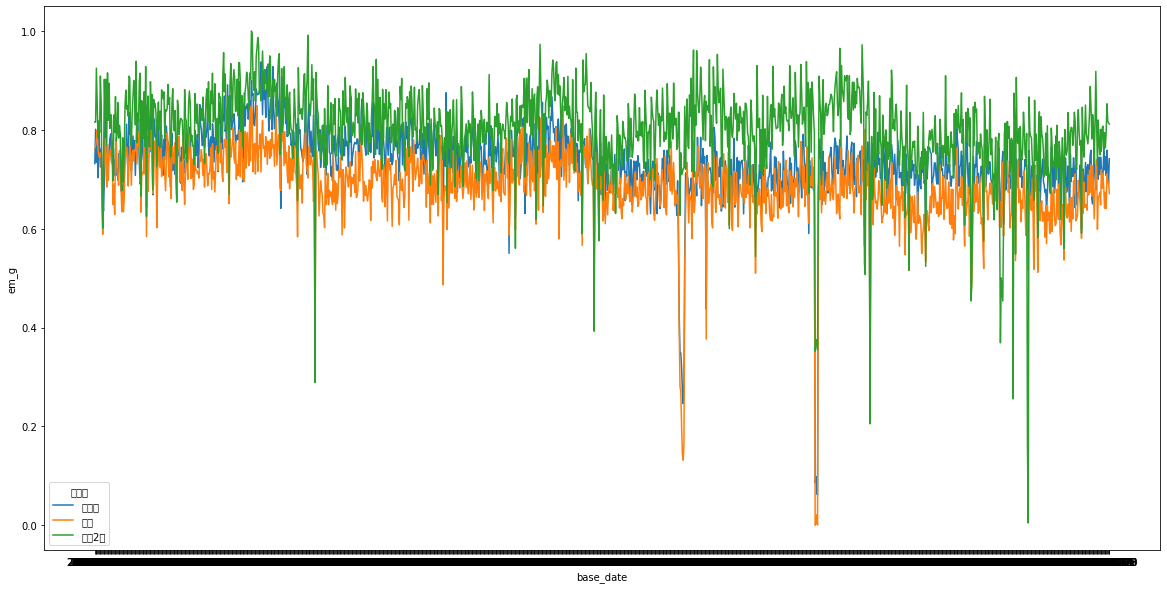

In [12]:
plt.rc('font', family='Malgun Gothic') 
sns.lineplot(data = data, x = 'base_date', y = 'em_g', hue = '읍면동')

plt.savefig('g0 읍면동별 배출량 패턴.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

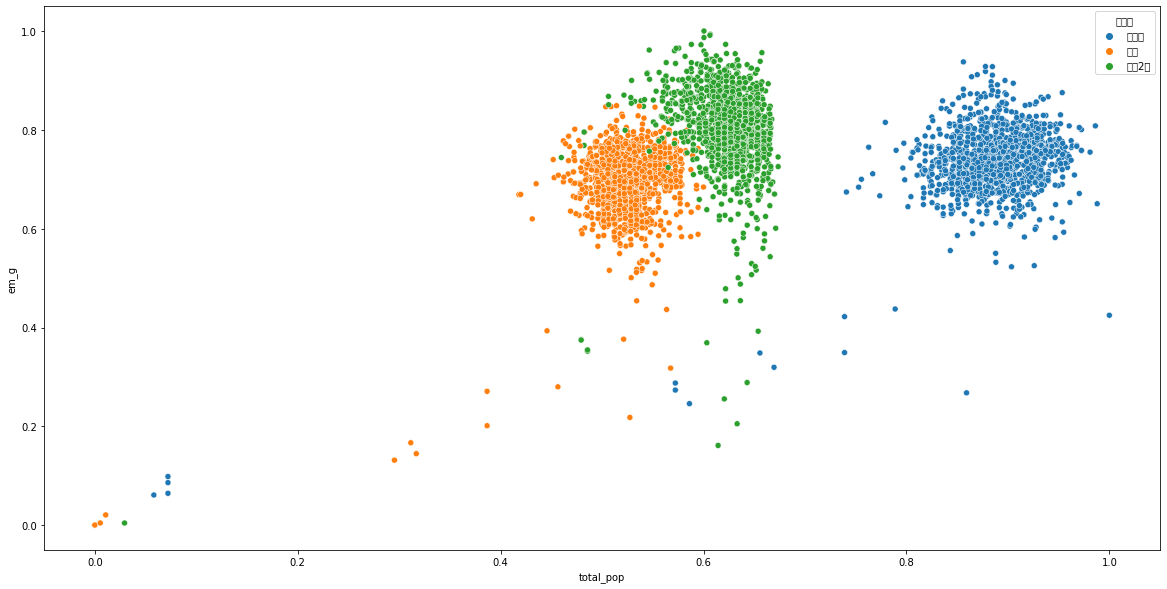

In [13]:
sns.scatterplot(data = data, x = 'total_pop', y = 'em_g', hue = '읍면동')
plt.savefig('g0 읍면동별 total_pop.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

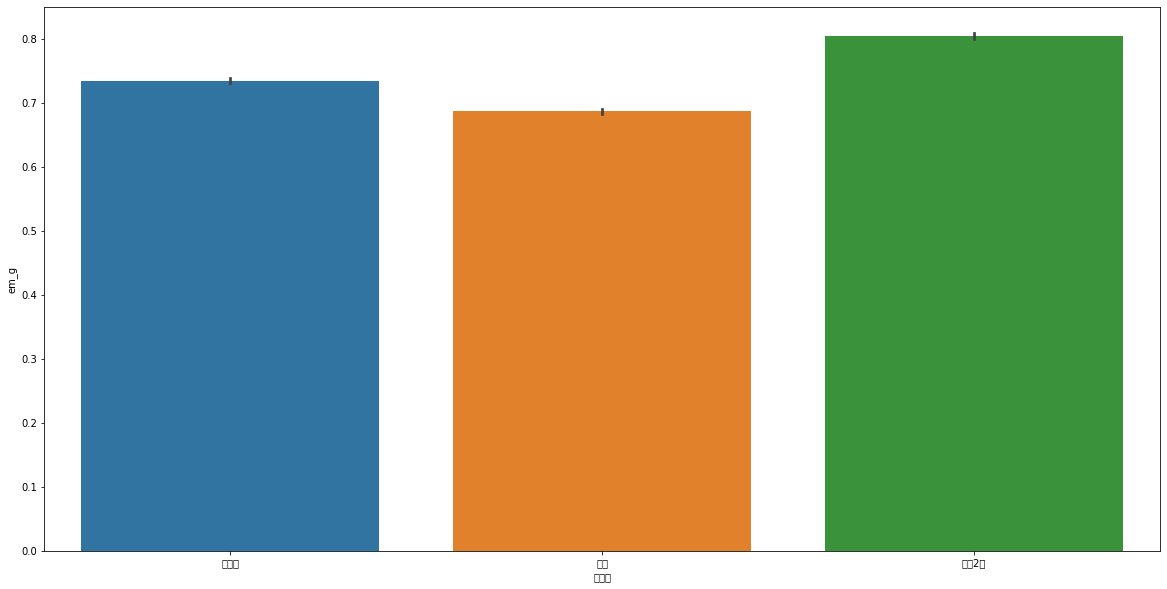

In [14]:
sns.barplot(data = data, x = '읍면동', y = 'em_g')
plt.savefig('g1 읍면동별 배출량 규모.png', dpi=300)

### G0 읍면동 특징분석

In [15]:
g1 = pd.DataFrame(pd.pivot_table(df[df['그룹']==1], index = ['base_date', '읍면동'],
                               values = ['배달_use_cnt', 'em_g', 'total_pop'], aggfunc='sum'))

In [16]:
g1 = g1.reset_index()

In [17]:
g1

,base_date,읍면동,em_g,total_pop,배달_use_cnt
0,2018-01-01,건입동,2783900.0,280784.0,280.0
1,2018-01-01,남원읍,2479200.0,868560.0,2200.0
2,2018-01-01,대륜동,1637400.0,273020.0,800.0
3,2018-01-01,대정읍,1779900.0,542472.0,1632.0
4,2018-01-01,대천동,1680100.0,308292.0,460.0
...,...,...,...,...,...
34168,2021-06-30,중앙동,228300.0,3430.0,130.0
34169,2021-06-30,천지동,414100.0,14324.0,640.0
34170,2021-06-30,표선면,1274800.0,393111.0,4650.0
34171,2021-06-30,한경면,1947700.0,560205.0,4720.0


In [18]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()

data=g1
print(minMaxScaler.fit(data[['em_g','total_pop','배달_use_cnt']]))
output = minMaxScaler.transform(data[['em_g','total_pop','배달_use_cnt']])
scaled = pd.DataFrame(output, columns=['em_g','total_pop','배달_use_cnt'], index=list(data.index.values))
scaled.head(3)

MinMaxScaler(copy=True, feature_range=(0, 1))


,em_g,total_pop,배달_use_cnt
0,0.384492,0.166803,0.003233
1,0.342377,0.519168,0.026224
2,0.226026,0.162149,0.009460


In [19]:
data = scaled.join(g1[['읍면동','base_date']])
data.head()

,em_g,total_pop,배달_use_cnt,읍면동,base_date
0,0.384492,0.166803,0.003233,건입동,2018-01-01
1,0.342377,0.519168,0.026224,남원읍,2018-01-01
2,0.226026,0.162149,0.009460,대륜동,2018-01-01
3,0.245722,0.323682,0.019423,대정읍,2018-01-01
4,0.231928,0.183294,0.005389,대천동,2018-01-01


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_

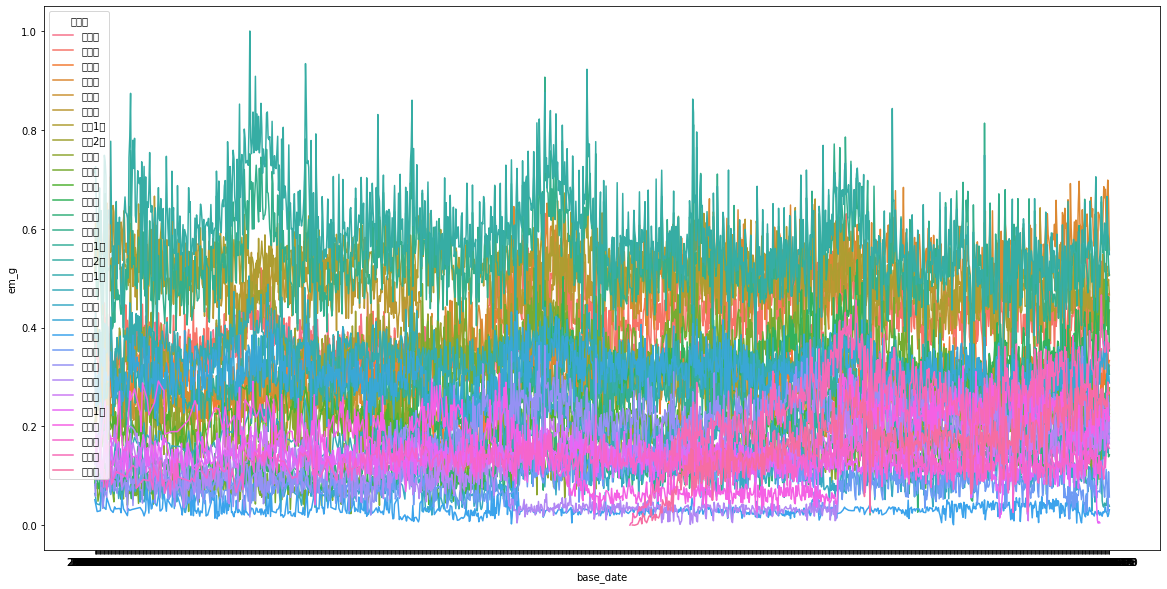

In [20]:
plt.rc('font', family='Malgun Gothic') 
sns.lineplot(data = data, x = 'base_date', y = 'em_g', hue = '읍면동')

plt.savefig('g1 읍면동별 배출량 패턴.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_

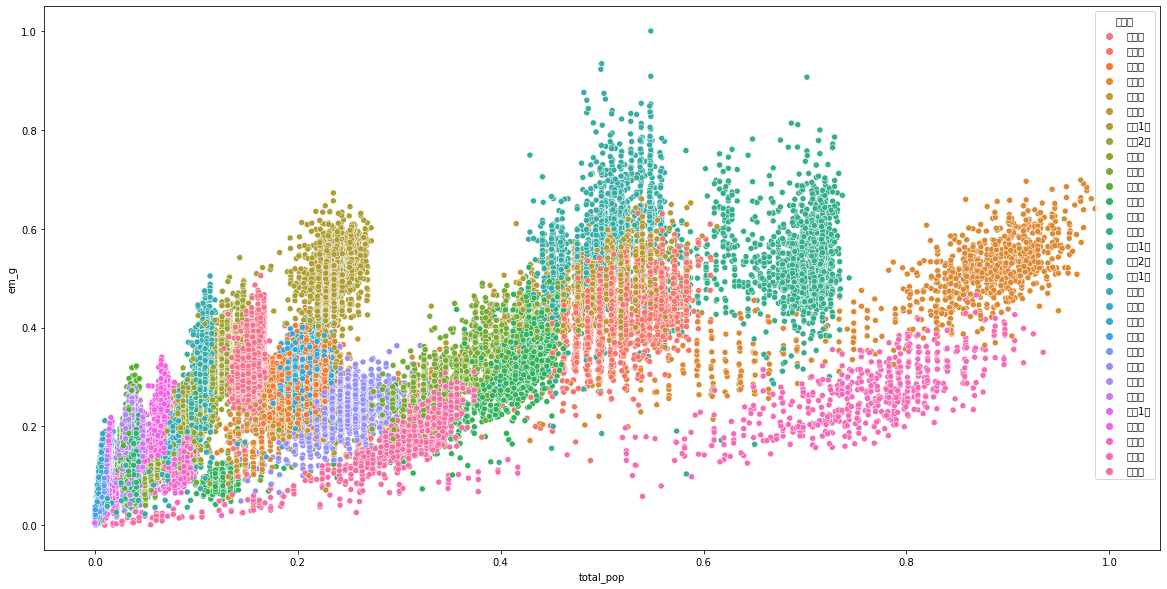

In [21]:
sns.scatterplot(data = data, x = 'total_pop', y = 'em_g', hue = '읍면동')
plt.savefig('g1 읍면동별 total_pop.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_

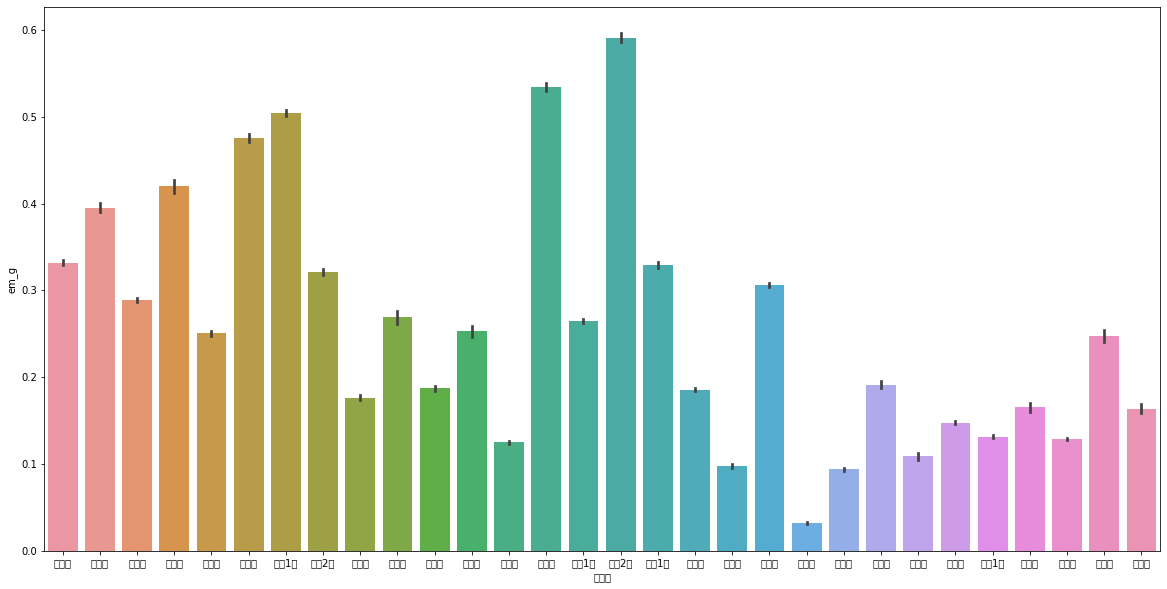

In [22]:
sns.barplot(data = data, x = '읍면동', y = 'em_g')
plt.savefig('g1 읍면동별 배출량 규모.png', dpi=300)

### G2 읍면동 특징분석

In [23]:
g2 = pd.DataFrame(pd.pivot_table(df[df['그룹']==2], index = ['base_date', '읍면동'],
                               values = ['배달_use_cnt', 'em_g', 'total_pop','외식_use_amt'], aggfunc='sum'))

In [24]:
g2 = g2.reset_index()

In [25]:
g2

,base_date,읍면동,em_g,total_pop,배달_use_cnt,외식_use_amt
0,2018-01-01,삼양동,3634000.0,1348480.0,3808.0,7.309306e+09
1,2018-01-01,아라동,7027300.0,3115233.0,7722.0,1.639227e+10
2,2018-01-01,애월읍,203900.0,35206.0,68.0,1.328010e+08
3,2018-01-01,외도동,4432200.0,1181880.0,1680.0,6.729432e+09
4,2018-01-01,일도2동,9400600.0,2468270.0,8260.0,1.425213e+10
...,...,...,...,...,...,...
8838,2021-06-30,외도동,3951600.0,1207440.0,58104.0,6.202122e+09
8839,2021-06-30,일도2동,8370400.0,2304470.0,116900.0,1.081575e+10
8840,2021-06-30,조천읍,4350900.0,2933480.0,70512.0,1.146618e+10
8841,2021-06-30,한림읍,6128800.0,2495124.0,52428.0,8.731312e+09


In [26]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()

data=g2
print(minMaxScaler.fit(data[['em_g','total_pop','배달_use_cnt']]))
output = minMaxScaler.transform(data[['em_g','total_pop','배달_use_cnt']])
scaled = pd.DataFrame(output, columns=['em_g','total_pop','배달_use_cnt'], index=list(data.index.values))
scaled.head(3)

MinMaxScaler(copy=True, feature_range=(0, 1))


,em_g,total_pop,배달_use_cnt
0,0.302780,0.246261,0.012260
1,0.585506,0.574944,0.024894
2,0.016989,0.001942,0.000187


In [27]:
data = scaled.join(g2[['읍면동','base_date']])
data.head()

,em_g,total_pop,배달_use_cnt,읍면동,base_date
0,0.302780,0.246261,0.012260,삼양동,2018-01-01
1,0.585506,0.574944,0.024894,아라동,2018-01-01
2,0.016989,0.001942,0.000187,애월읍,2018-01-01
3,0.369285,0.215267,0.005391,외도동,2018-01-01
4,0.783246,0.454584,0.026631,일도2동,2018-01-01


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_

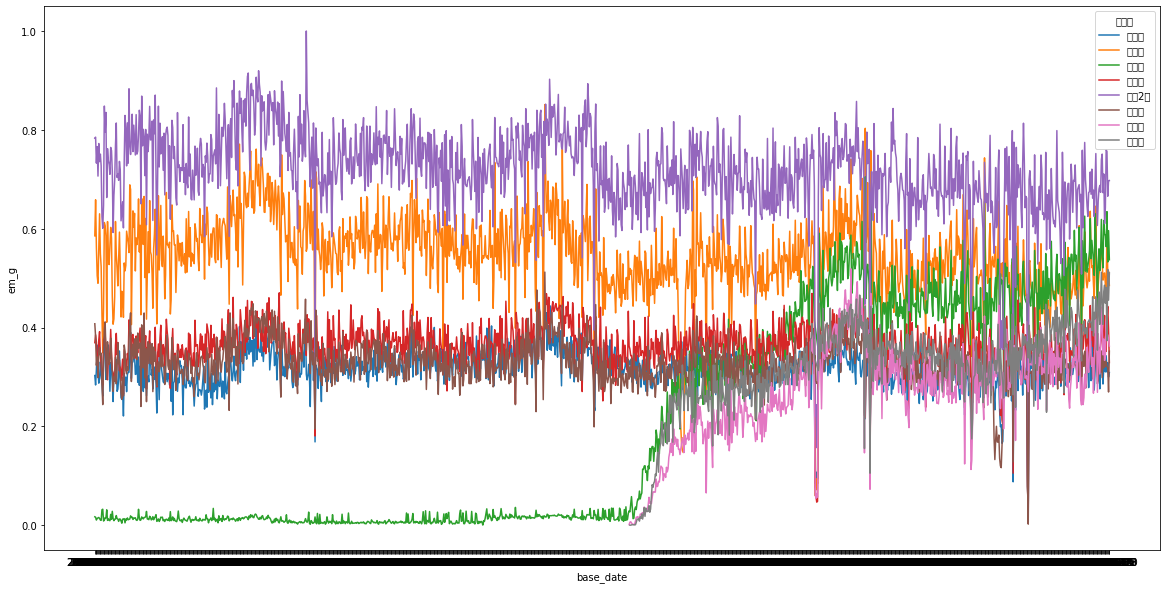

In [28]:
plt.rc('font', family='Malgun Gothic') 
sns.lineplot(data = data, x = 'base_date', y = 'em_g', hue = '읍면동')

plt.savefig('g2 읍면동별 배출량 패턴.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_

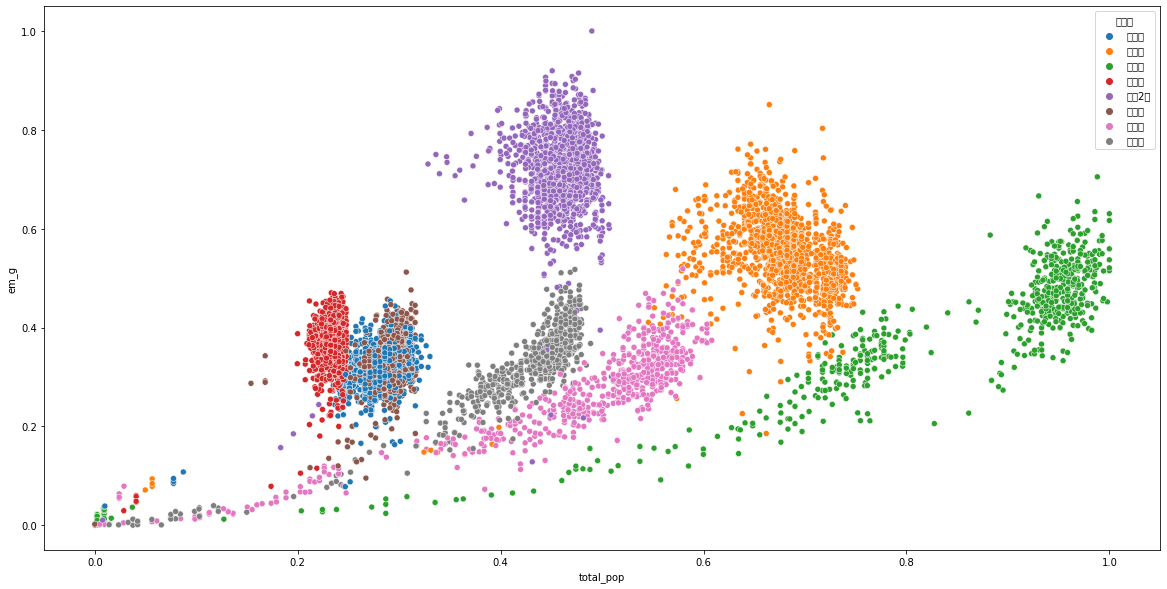

In [29]:
sns.scatterplot(data = data, x = 'total_pop', y = 'em_g', hue = '읍면동')
plt.savefig('g2 읍면동별 외식_use_amt.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_

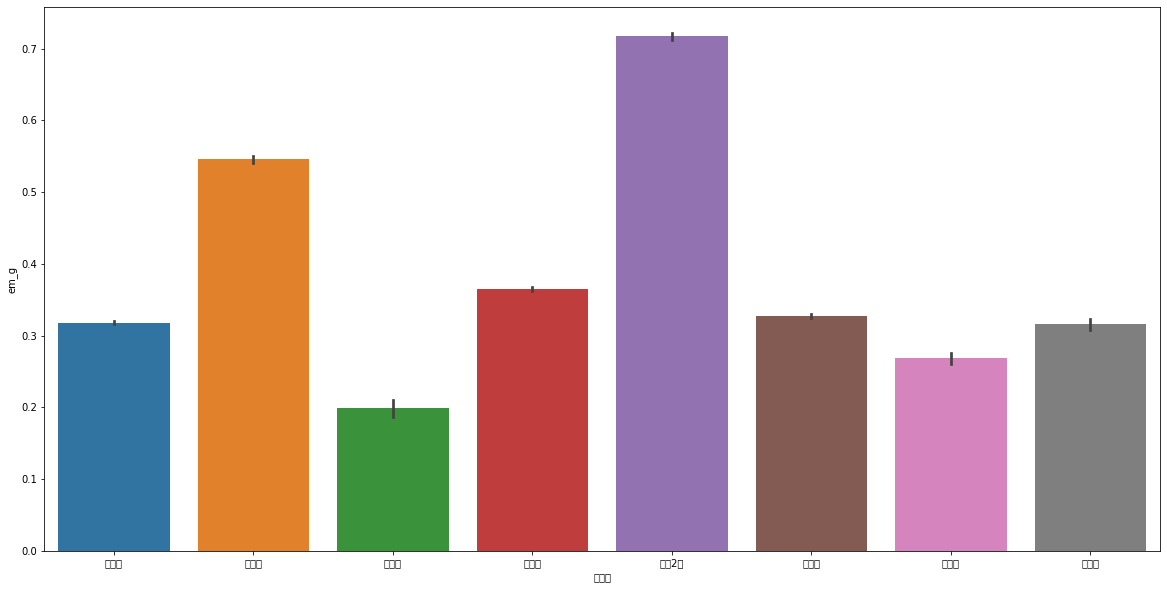

In [30]:
sns.barplot(data = data, x = '읍면동', y = 'em_g')
plt.savefig('g2 읍면동별 배출량 규모.png', dpi=300)

# 그룹별 상관계수

In [31]:
import pandas as pd

## 그룹별 파일 불러오기

In [32]:
df = pd.read_csv('G0.csv',encoding='EUC-KR')
df

,Unnamed: 0,base_date,base_year,base_month,emd_nm,em_g,resid_reg_pop,foreign_pop,total_pop,외식_use_amt,장보기_use_amt,배달_use_amt
0,0,2018-01-01,2018.0,1.0,건입동,2783900.0,274400.0,6384.0,280784.0,1.848309e+09,1.598653e+09,3024560.0
1,1,2018-01-01,2018.0,1.0,남원읍,2479200.0,840928.0,27632.0,868560.0,2.229783e+09,3.820992e+09,56688896.0
2,2,2018-01-01,2018.0,1.0,대륜동,1637400.0,269460.0,3560.0,273020.0,1.225607e+09,1.660201e+09,15869120.0
3,3,2018-01-01,2018.0,1.0,대정읍,1779900.0,506040.0,36432.0,542472.0,1.431907e+09,1.981770e+09,24581424.0
4,4,2018-01-01,2018.0,1.0,대천동,1680100.0,302680.0,5612.0,308292.0,1.332838e+09,1.956420e+09,7453380.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36750,36750,2021-06-30,2021.0,6.0,중앙동,228300.0,3358.0,72.0,3430.0,1.232853e+07,8.908744e+07,2678978.0
36751,36751,2021-06-30,2021.0,6.0,천지동,414100.0,13864.0,460.0,14324.0,4.606474e+07,1.435465e+08,17266984.0
36752,36752,2021-06-30,2021.0,6.0,표선면,1274800.0,382757.0,10354.0,393111.0,1.128260e+09,4.375920e+09,115058546.0
36753,36753,2021-06-30,2021.0,6.0,한경면,1947700.0,540322.0,19883.0,560205.0,1.791304e+09,3.467478e+09,82323998.0


In [33]:
df1 = pd.read_csv('G1.csv',encoding='EUC-KR')
df1

,Unnamed: 0,base_date,base_year,base_month,emd_nm,em_g,resid_reg_pop,foreign_pop,total_pop,외식_use_amt,장보기_use_amt,배달_use_amt
0,0,2018-01-01,2018.0,1.0,노형동,11174800.0,6884601.0,204981.0,7089582.0,4.838784e+10,5.516968e+10,5.639705e+08
1,1,2018-01-01,2018.0,1.0,연동,11621600.0,4743426.0,185706.0,4929132.0,4.032711e+10,4.035705e+10,8.575217e+08
2,2,2018-01-01,2018.0,1.0,이도2동,12375000.0,5060403.0,56358.0,5116761.0,3.381571e+10,3.810667e+10,7.242001e+08
3,3,2018-01-02,2018.0,1.0,노형동,12165500.0,6831232.0,203392.0,7034624.0,4.176608e+10,5.279750e+10,4.427389e+08
4,4,2018-01-02,2018.0,1.0,연동,11692200.0,4618599.0,180819.0,4799418.0,2.760284e+10,2.750882e+10,7.869181e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
3826,3826,2021-06-29,2021.0,6.0,연동,10655000.0,4316730.0,193125.0,4509855.0,2.735881e+10,3.593539e+10,6.727352e+09
3827,3827,2021-06-29,2021.0,6.0,이도2동,12343400.0,5103959.0,57989.0,5161948.0,2.860010e+10,3.513199e+10,6.856870e+09
3828,3828,2021-06-30,2021.0,6.0,노형동,11316200.0,7200050.0,271440.0,7471490.0,4.540463e+10,5.971623e+10,1.179156e+10
3829,3829,2021-06-30,2021.0,6.0,연동,10306200.0,4316730.0,193125.0,4509855.0,3.022483e+10,3.945596e+10,8.360185e+09


In [34]:
df2 = pd.read_csv('G2.csv',encoding='EUC-KR')
df2

,Unnamed: 0,base_date,base_year,base_month,emd_nm,em_g,resid_reg_pop,foreign_pop,total_pop,외식_use_amt,장보기_use_amt,배달_use_amt
0,0,2018-01-01,2018.0,1.0,삼양동,3634000.0,1334760.0,13720.0,1348480.0,7.309306e+09,1.018558e+10,8.606248e+07
1,1,2018-01-01,2018.0,1.0,아라동,7027300.0,3016728.0,98505.0,3115233.0,1.639227e+10,2.091498e+10,1.570071e+08
2,2,2018-01-01,2018.0,1.0,애월읍,203900.0,34271.0,935.0,35206.0,1.328010e+08,2.111384e+08,1.555488e+06
3,3,2018-01-01,2018.0,1.0,외도동,4432200.0,1166368.0,15512.0,1181880.0,6.729432e+09,8.607936e+09,4.025414e+07
4,4,2018-01-01,2018.0,1.0,일도2동,9400600.0,2448950.0,19320.0,2468270.0,1.425213e+10,1.590235e+10,1.692379e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
8846,8846,2021-06-30,2021.0,6.0,외도동,3951600.0,1192644.0,14796.0,1207440.0,6.202122e+09,9.856595e+09,1.312327e+09
8847,8847,2021-06-30,2021.0,6.0,일도2동,8370400.0,2285220.0,19250.0,2304470.0,1.081575e+10,1.619696e+10,2.654139e+09
8848,8848,2021-06-30,2021.0,6.0,조천읍,4350900.0,2874607.0,58873.0,2933480.0,1.146618e+10,1.743396e+10,1.811017e+09
8849,8849,2021-06-30,2021.0,6.0,한림읍,6128800.0,2165664.0,329460.0,2495124.0,8.731312e+09,1.669691e+10,1.123768e+09


## 그룹별 상관계수 측정에 불필요한 컬럼 제거

In [35]:
df = df.drop(['base_year', 'base_month', 'Unnamed: 0','resid_reg_pop','foreign_pop'], axis=1)
df

,base_date,emd_nm,em_g,total_pop,외식_use_amt,장보기_use_amt,배달_use_amt
0,2018-01-01,건입동,2783900.0,280784.0,1.848309e+09,1.598653e+09,3024560.0
1,2018-01-01,남원읍,2479200.0,868560.0,2.229783e+09,3.820992e+09,56688896.0
2,2018-01-01,대륜동,1637400.0,273020.0,1.225607e+09,1.660201e+09,15869120.0
3,2018-01-01,대정읍,1779900.0,542472.0,1.431907e+09,1.981770e+09,24581424.0
4,2018-01-01,대천동,1680100.0,308292.0,1.332838e+09,1.956420e+09,7453380.0
...,...,...,...,...,...,...,...
36750,2021-06-30,중앙동,228300.0,3430.0,1.232853e+07,8.908744e+07,2678978.0
36751,2021-06-30,천지동,414100.0,14324.0,4.606474e+07,1.435465e+08,17266984.0
36752,2021-06-30,표선면,1274800.0,393111.0,1.128260e+09,4.375920e+09,115058546.0
36753,2021-06-30,한경면,1947700.0,560205.0,1.791304e+09,3.467478e+09,82323998.0


In [36]:
df1 = df1.drop(['base_year', 'base_month', 'Unnamed: 0','resid_reg_pop','foreign_pop'], axis=1)
df1

,base_date,emd_nm,em_g,total_pop,외식_use_amt,장보기_use_amt,배달_use_amt
0,2018-01-01,노형동,11174800.0,7089582.0,4.838784e+10,5.516968e+10,5.639705e+08
1,2018-01-01,연동,11621600.0,4929132.0,4.032711e+10,4.035705e+10,8.575217e+08
2,2018-01-01,이도2동,12375000.0,5116761.0,3.381571e+10,3.810667e+10,7.242001e+08
3,2018-01-02,노형동,12165500.0,7034624.0,4.176608e+10,5.279750e+10,4.427389e+08
4,2018-01-02,연동,11692200.0,4799418.0,2.760284e+10,2.750882e+10,7.869181e+08
...,...,...,...,...,...,...,...
3826,2021-06-29,연동,10655000.0,4509855.0,2.735881e+10,3.593539e+10,6.727352e+09
3827,2021-06-29,이도2동,12343400.0,5161948.0,2.860010e+10,3.513199e+10,6.856870e+09
3828,2021-06-30,노형동,11316200.0,7471490.0,4.540463e+10,5.971623e+10,1.179156e+10
3829,2021-06-30,연동,10306200.0,4509855.0,3.022483e+10,3.945596e+10,8.360185e+09


In [37]:
df2 = df2.drop(['base_year', 'base_month', 'Unnamed: 0','resid_reg_pop','foreign_pop'], axis=1)
df2

,base_date,emd_nm,em_g,total_pop,외식_use_amt,장보기_use_amt,배달_use_amt
0,2018-01-01,삼양동,3634000.0,1348480.0,7.309306e+09,1.018558e+10,8.606248e+07
1,2018-01-01,아라동,7027300.0,3115233.0,1.639227e+10,2.091498e+10,1.570071e+08
2,2018-01-01,애월읍,203900.0,35206.0,1.328010e+08,2.111384e+08,1.555488e+06
3,2018-01-01,외도동,4432200.0,1181880.0,6.729432e+09,8.607936e+09,4.025414e+07
4,2018-01-01,일도2동,9400600.0,2468270.0,1.425213e+10,1.590235e+10,1.692379e+08
...,...,...,...,...,...,...,...
8846,2021-06-30,외도동,3951600.0,1207440.0,6.202122e+09,9.856595e+09,1.312327e+09
8847,2021-06-30,일도2동,8370400.0,2304470.0,1.081575e+10,1.619696e+10,2.654139e+09
8848,2021-06-30,조천읍,4350900.0,2933480.0,1.146618e+10,1.743396e+10,1.811017e+09
8849,2021-06-30,한림읍,6128800.0,2495124.0,8.731312e+09,1.669691e+10,1.123768e+09


## 그룹별 상관계수 측정
그룹1

In [38]:
corr_df1 = df.corrwith(df['em_g'], method='spearman')
corr_df1

em_g           1.000000
total_pop      0.834404
외식_use_amt     0.881095
장보기_use_amt    0.862234
배달_use_amt     0.708556
dtype: float64

In [39]:
corr_df2 = corr_df1.apply(lambda x: round(x ,2))
corr_df2

em_g           1.00
total_pop      0.83
외식_use_amt     0.88
장보기_use_amt    0.86
배달_use_amt     0.71
dtype: float64

In [40]:
s = corr_df2
s

em_g           1.00
total_pop      0.83
외식_use_amt     0.88
장보기_use_amt    0.86
배달_use_amt     0.71
dtype: float64

In [41]:
DATA1 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
DATA1.style.background_gradient(cmap='GnBu')

,corr
외식_use_amt,0.880000
장보기_use_amt,0.860000
total_pop,0.830000
배달_use_amt,0.710000


그룹 2

In [42]:
corr_df2 = df1.corrwith(df1['em_g'], method='spearman')
corr_df2

em_g           1.000000
total_pop      0.247680
외식_use_amt     0.165346
장보기_use_amt    0.083075
배달_use_amt    -0.377580
dtype: float64

In [43]:
corr_df3 = corr_df2.apply(lambda x: round(x ,2))
corr_df3

em_g           1.00
total_pop      0.25
외식_use_amt     0.17
장보기_use_amt    0.08
배달_use_amt    -0.38
dtype: float64

In [44]:
s = corr_df3
s

em_g           1.00
total_pop      0.25
외식_use_amt     0.17
장보기_use_amt    0.08
배달_use_amt    -0.38
dtype: float64

In [45]:
df2_1 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df2_1.style.background_gradient(cmap='GnBu')

,corr
total_pop,0.250000
외식_use_amt,0.170000
장보기_use_amt,0.080000
배달_use_amt,-0.380000


그룹 3

In [46]:
corr_df4 = df2.corrwith(df2['em_g'], method='spearman')
corr_df4

em_g           1.000000
total_pop      0.579535
외식_use_amt     0.705473
장보기_use_amt    0.652148
배달_use_amt     0.379074
dtype: float64

In [47]:
corr_df5 = corr_df4.apply(lambda x: round(x ,2))
corr_df5

em_g           1.00
total_pop      0.58
외식_use_amt     0.71
장보기_use_amt    0.65
배달_use_amt     0.38
dtype: float64

In [48]:
s = corr_df5
s

em_g           1.00
total_pop      0.58
외식_use_amt     0.71
장보기_use_amt    0.65
배달_use_amt     0.38
dtype: float64

In [49]:
df2_2 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df2_2.style.background_gradient(cmap='GnBu')

,corr
외식_use_amt,0.710000
장보기_use_amt,0.650000
total_pop,0.580000
배달_use_amt,0.380000
